### 工作進度  
* 【置頂】**新的筆記內容架構**與**量化技術分析系統**相關資訊請參閱[250801筆記.ipynb](https://github.com/yilintung/StockInvestmentNotebook/blob/main/250801%E7%AD%86%E8%A8%98.ipynb)之「工作進度」。  
* 本日「K線追擊週報」LINE群組資訊：[楊忠憲K線追擊週報_250912日報.docx](https://mega.nz/file/31JzUZha#1R216qGgIDo7QMH6cV4yEUtTipC2n7wxDc-V7Xw5Pzo)。  

* 引入模組與定義公用函式  

In [1]:
import numpy as np
import mysys
import markdown
import base64
from IPython.core.display import HTML

In [2]:
def stock_analysis( analysis, stock_id, buttom_pattern = False) :
    results,images = analysis.analysis(stock_id)
    if buttom_pattern is True and '底部型態' in images :
        print('底型反轉交易策略：')
        display(images['底部型態'])
    print('解盤內容：')
    if '整體評價' in images :
        display(images['整體評價'])
    result_md   = results.to_markdown(tablefmt="grid")
    result_html = markdown.markdown(result_md, extensions=['markdown_grid_tables:GridTableExtension'])
    display(HTML(result_html))

* 更新量化技術分析資料庫  

In [3]:
mysys.UpdatestockDatabase()

2025-09-12 22:04:04.122 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockInfo, data_id: 


##### 更新台股總覽 #####
##### 更新技術分析資料 #####


2025-09-12 22:04:20.175 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-09-12 22:04:25.265 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-09-12 22:04:55.705 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-09-12 22:05:00.481 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-09-12 22:05:31.294 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-09-12 22:05:35.732 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-09-12 22:06:10.212 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-09-12 22:06:16.455 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 


周K：2025-09-08


2025-09-12 22:06:49.306 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 


日K：2025-09-12


* 建立「解盤」物件    

In [4]:
analysis = mysys.StockAnalysis()

### 大盤解盤  

* 加權指數  

> **盤前**：[K線捕手十秒鐘看台股](https://www.facebook.com/kevinyang20180801/posts/pfbid028aeskBwtzY5aYuRZhCZpAsqEmLhdKtZZMGGXTowRb46sykNesusgkXy7durQjSbbl)  
> 昨天台股先由櫃買指數遇壓轉弱，所以盤中中小型股先出現修正，加上盤前提到「加權指數未來續漲，20正乖離如果攀升到4.5%，短線會有過熱賣壓」，盤中也符合這個現象，所以加權指數也跟進轉弱。  
> 但不論籌碼、量能都還沒失控，所以暫時視為漲多過熱，獲利調節的賣壓，而且原先設定的轉折件也還沒符合，加權指數觀察5日線，櫃買指數觀察20日線。  
> 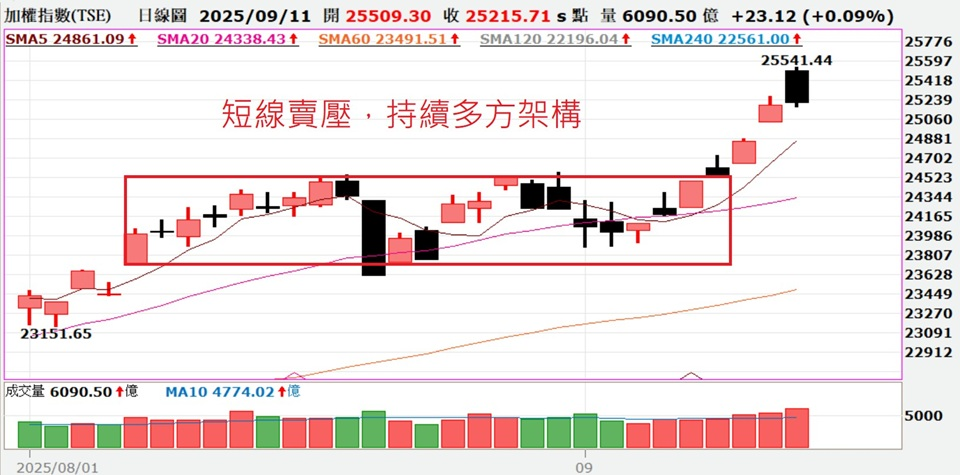  

In [5]:
# 盤整區間
def line_drawing_callback( range_prices) :

    seq_of_seq_of_points = []
    linewidths           = []
    colors               = []

    # 設定盤整區壓力線
    resistance_line_start_date  = '2025-08-07'
    resistance_line_end_date    = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    resistance_line_price       = range_prices.loc['2025-08-27']['Close']
    seq_of_seq_of_points.append([(resistance_line_start_date,resistance_line_price),(resistance_line_end_date,resistance_line_price)])
    linewidths.append(1.5)
    colors.append('xkcd:red')

    # 設定盤整區支撐線
    support_line_start_date  = '2025-08-07'
    support_line_end_date    = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    support_line_price       = range_prices.loc['2025-08-07']['Open']
    seq_of_seq_of_points.append([(support_line_start_date,support_line_price),(support_line_end_date,support_line_price)])
    linewidths.append(1.5)
    colors.append('xkcd:red')
    
    return seq_of_seq_of_points,linewidths,colors

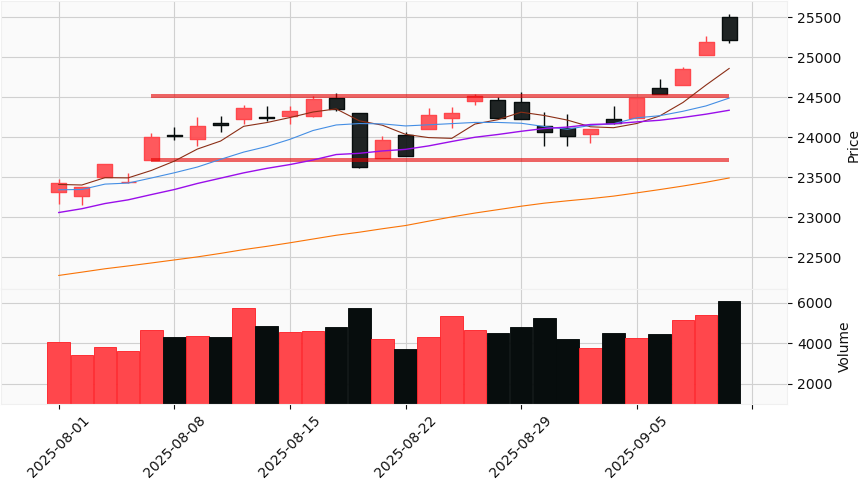

In [6]:
# 盤前：盤整區間繪製
image = mysys.DrawOnKlineChart('TAIEX','2025-08-01','2025-09-11',line_drawing_callback)
display(image)

> **盤後**：量化技術分析  

解盤內容：


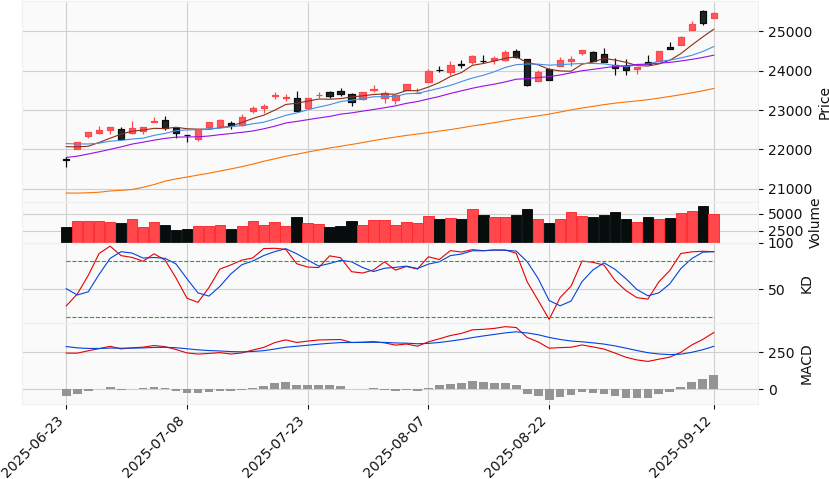

In [7]:
# 盤後：加權指數解盤
stock_analysis(analysis,'TAIEX')

* 櫃買指數   

> **盤前**：[K線捕手十秒鐘看台股](https://www.facebook.com/kevinyang20180801/posts/pfbid028aeskBwtzY5aYuRZhCZpAsqEmLhdKtZZMGGXTowRb46sykNesusgkXy7durQjSbbl)  
> 昨天台股先由櫃買指數遇壓轉弱，所以盤中中小型股先出現修正，加上盤前提到「加權指數未來續漲，20正乖離如果攀升到4.5%，短線會有過熱賣壓」，盤中也符合這個現象，所以加權指數也跟進轉弱。  
> 但不論籌碼、量能都還沒失控，所以暫時視為漲多過熱，獲利調節的賣壓，而且原先設定的轉折件也還沒符合，加權指數觀察5日線，櫃買指數觀察20日線。  
> 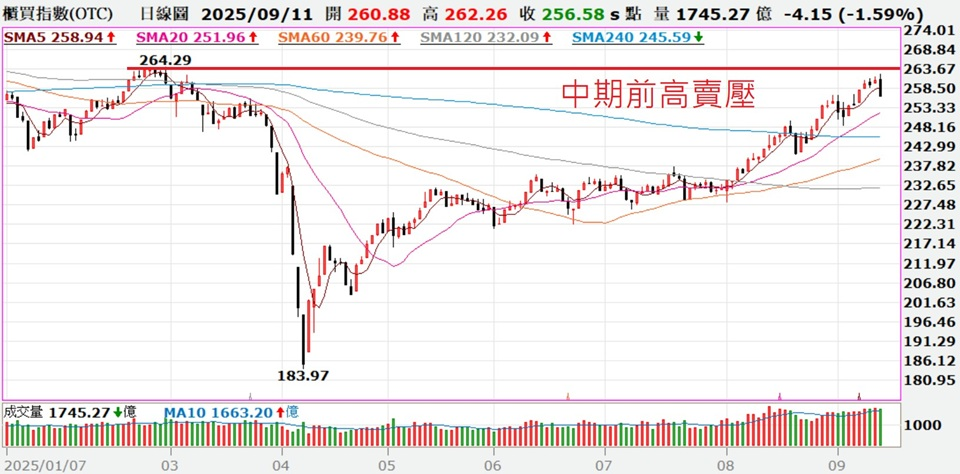  

In [8]:
# 壓力線
def line_drawing_callback( range_prices) :

    seq_of_seq_of_points = []
    linewidths           = []
    colors               = []

    # 設定壓力線
    resistance_line_start_date  = '2025-02-18'
    resistance_line_end_date    = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    resistance_line_price       = range_prices.loc['2025-02-24']['Close']
    seq_of_seq_of_points.append([(resistance_line_start_date,resistance_line_price),(resistance_line_end_date,resistance_line_price)])
    linewidths.append(2.0)
    colors.append('xkcd:red')
    
    return seq_of_seq_of_points,linewidths,colors

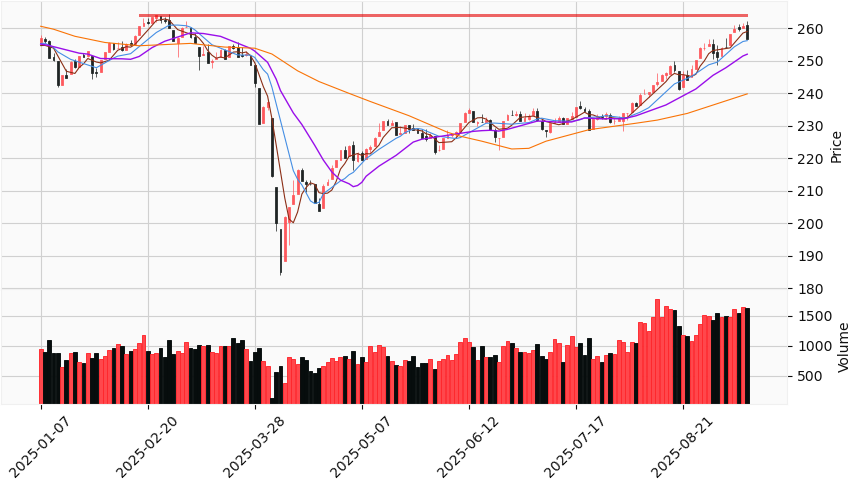

In [9]:
# 盤前：壓力線繪製
image = mysys.DrawOnKlineChart('TPEx','2025-01-07','2025-09-11',line_drawing_callback)
display(image)

> **盤後**：量化技術分析  

解盤內容：


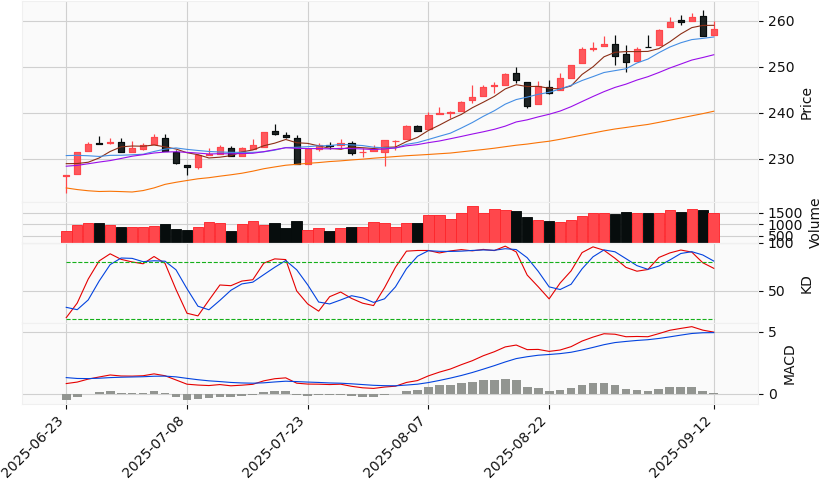

In [10]:
# 盤後：櫃買指數解盤
stock_analysis(analysis,'TPEx')

### 個股解盤  

* 盟立(2464)  
  看法：無法突破壓力區與(我所規劃之)滿足區，因此進入箱型整理；並且這兩天開高走低收黑K，將會持續追蹤。  

> **盤後**：量化技術分析  

解盤內容：


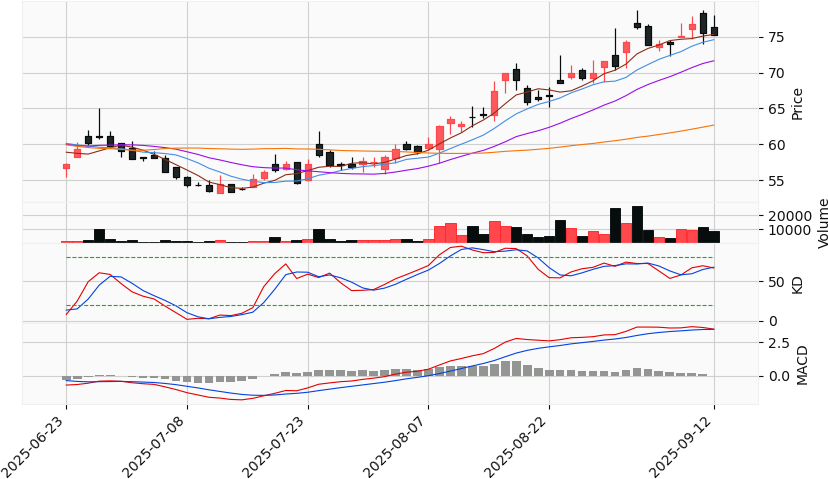

In [11]:
stock_analysis(analysis,'2464')

> **盤後**：底部反轉交易策略分析  

In [12]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-03-26'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-05-15']['Close']

    # 設定底部日期與價格
    bottom_date  = '2025-04-10'
    bottom_price = range_prices.loc['2025-04-10']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2025-08-15'

    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

估算目標價為78.10元


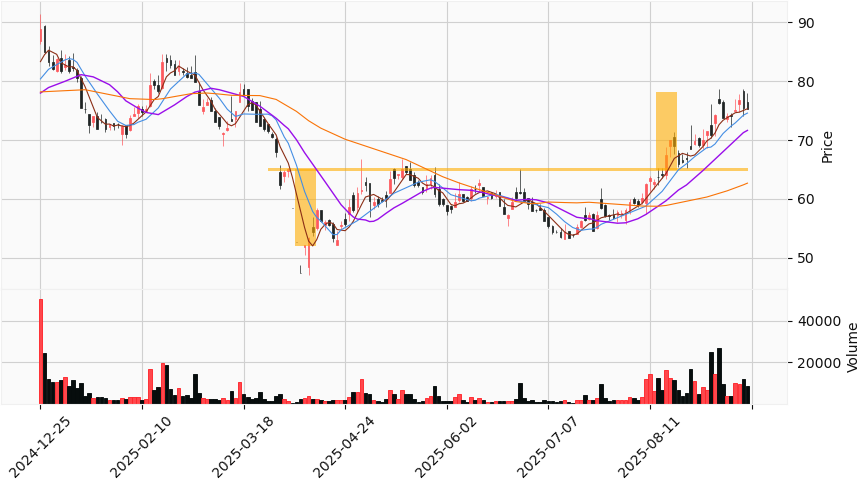

In [13]:
image = mysys.DrawOnKlineChart('2464','2024-12-25','2025-09-12',line_drawing_callback)
display(image)

籌碼面：  
法人小買(+65)：外資小買(+64)、投信中立(-1)、自營中立(+2)。  
主力小買(+142)。  
分公司買賣家數差集中(+2)。  
融資增(+48)、融券增(+26)。  

* 百和興業-KY(8404)  
  看法：短線轉弱，回測型態頸線。  

> **盤後**：量化技術分析  

底型反轉交易策略：


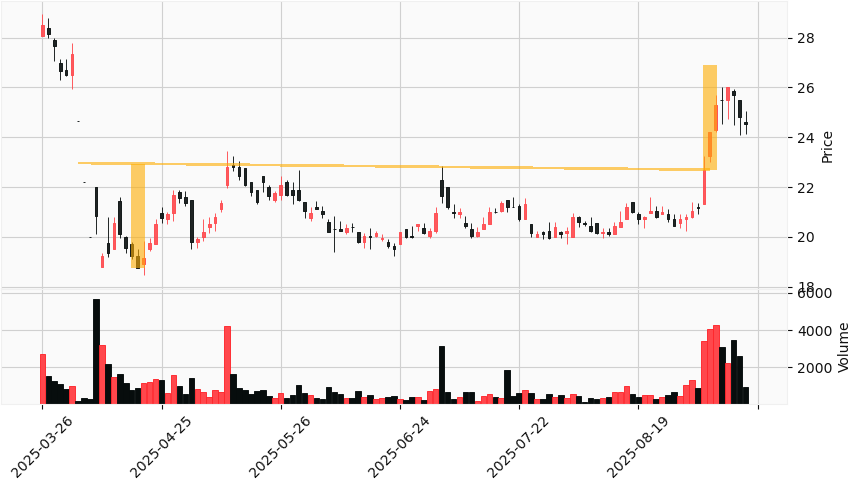

解盤內容：


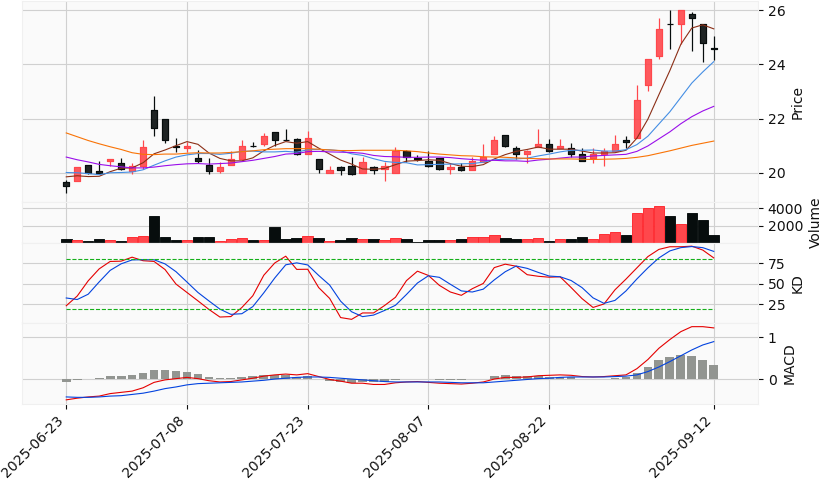

In [14]:
stock_analysis(analysis,'8404',buttom_pattern = True)

> **盤後**：底部反轉交易策略分析  

In [15]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-03-31'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-05-14']['Open']

    # 設定底部日期與價格
    bottom_date  = '2025-04-21'
    bottom_price = range_prices.loc['2025-04-21']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2025-09-04'

    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

估算目標價為27.05元


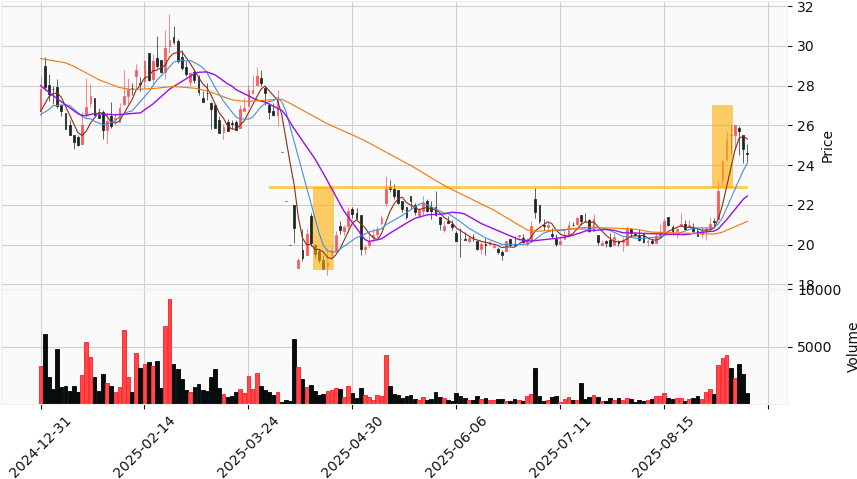

In [16]:
image = mysys.DrawOnKlineChart('8404','2024-12-31','2025-09-12',line_drawing_callback)
display(image)

籌碼面：  
法人小賣(-109)：外資小賣(-120)、投信中立(0)、自營小買(+11)。  
主力中立(+4)。  
分公司買賣家數差集中(+12)。  
融資增(+18)、融券增(+1)。  